Here I am going to attempt to make a dating recommendation system off of amazon food reviews.

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import math 
from datetime import date, timedelta

import time 

import random
from random import randint

import json
from copy import deepcopy

from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate


from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline

from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson 

from surprise import accuracy 
from surprise import Reader
from surprise import Dataset
from surprise import dataset

from surprise.dataset import DatasetAutoFolds

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/aqureshi/Desktop/DS 021720/dspractice/data/reviews.csv')
data.head

<bound method NDFrame.head of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNu

In [3]:
df = pd.DataFrame(data)
df.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


Just from looking at the top of the dataframe and the bottom. We can see that the reviews are not just for frozen or ready meals. These reviews comprise of, but not limited to: <br>
- food for animals
- raw ingredients 
- candy 
- snacks
- dairy 
- breakfast foods
- bread and bakery 
- beverages 
(there even seems to be dog food) For the end goal, it could be super convenient to match people based off of not only the food they purchase for themselves but also the food they purchase for their pets)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Here we can also see that the dataframe comprises of product and user ids', the time, summary and helpfulness. I want to pay special attention to the similarities in product id but also the similarities within each user. 

My goal is to do two things here: 1. To create a recommendation system based on products which I will probably use a KNN but also flip it to also look at users and match them based on purchases. I will match Ids here based on the purchases they made. 

In [6]:
print(df.shape) #let's look at how big this is 

(568454, 10)


We know that with regards to making this work we need to reduce the amount of data we apply to the following machine learning models, given that most of the machine learning models we are using are computationally expensive. 

In [7]:
df.dropna(inplace=True) #let's reduce any null values
print(df.shape)

(568411, 10)


This has dropped some but not all 

In [8]:
data.describe().T #over view of data

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [9]:
print("Total Data")
print("-"*50)
print("\nTotal no of ratings:", data.shape[0])
print("Total no of users :", len(np.unique(data['UserId'])))
print("Total no of products :", len(np.unique(data['ProductId'])))

Total Data
--------------------------------------------------

Total no of ratings: 568454
Total no of users : 256059
Total no of products : 74258


What can we see from all of this?

There doesn't seem to be anything missing. I'm sure I can find a suggestion of what should be added in order for it to be more enticing.

The four attributes are: <br>
UserId <br>
ProductId<br>
Rating<br>
Timestamp

# Exploratory Data Analysis

## Most Popular Ratings


[Text(0.5, 0, 'Rating'), Text(0, 0.5, 'Count')]

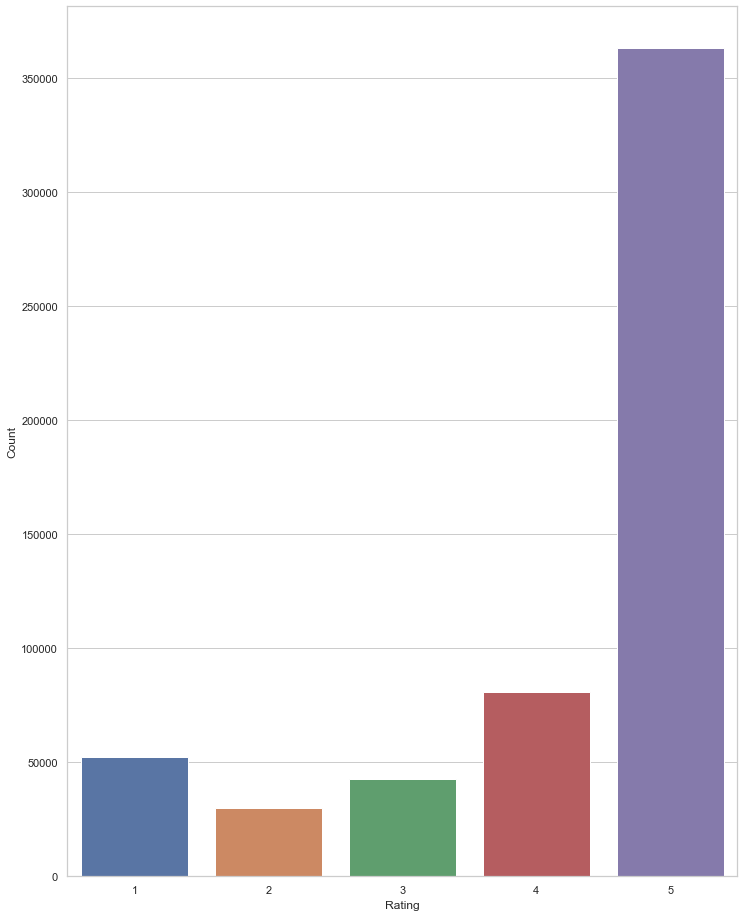

In [10]:
sns.set(rc={'figure.figsize':(12, 16)})
sns.set_style('whitegrid')
ax = sns.countplot(x='Score', data=data)
ax.set(xlabel='Rating', ylabel='Count')

A majority of users tend to give high ratings. Another thing which we can obtain from the frequency of reviews is that more 1 star ratings are given than 2 or 3. 

We can even go as far as to check the average rating of each review. At first thought this doesn't seem to be useful, but if Amazon actually wanted to have a look at its distribution channel in terms of suppliers, Amazon could actually power its dating matches with its highest reviewed products. This helps to take a look at quality assurance and also this could also factor in the Timestamp. 
If the company wanted to, it could technically push sales through its dating recommendations and new products from the same vendors at specific times. 

In [11]:
avg_rating_of_each_product = data.groupby('ProductId')['Score'].mean()
avg_rating_of_each_product.head()

ProductId
0006641040    4.351351
141278509X    5.000000
2734888454    3.500000
2841233731    5.000000
7310172001    4.751445
Name: Score, dtype: float64

In [12]:
avg_rating_of_each_product.tail()

ProductId
B009UOFTUI    1.0
B009UOFU20    1.0
B009UUS05I    5.0
B009WSNWC4    5.0
B009WVB40S    5.0
Name: Score, dtype: float64

<AxesSubplot:xlabel='Score', ylabel='Density'>

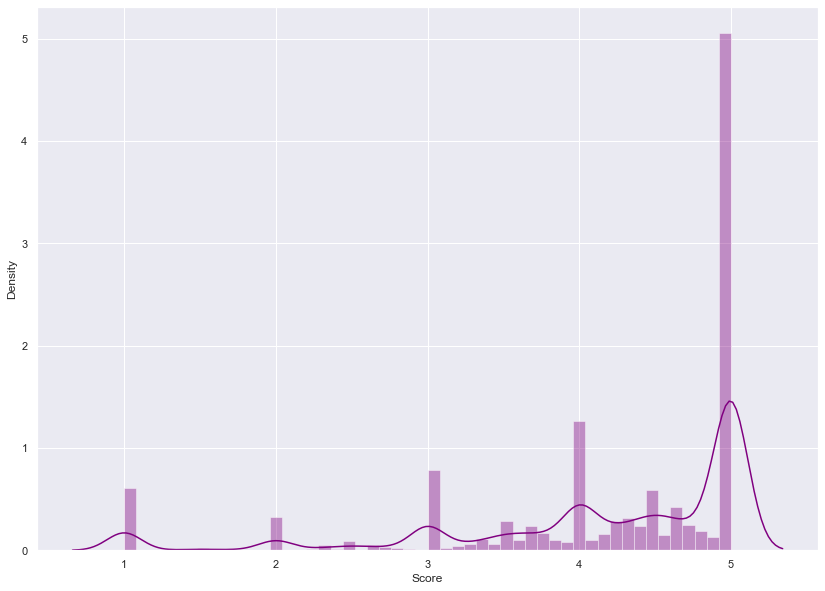

In [13]:
#let's see what data.head part of the average rating of each product looks like in a graph 
sns.set(rc={'figure.figsize':(14, 10)})
sns.distplot(avg_rating_of_each_product, color='purple', kde=True)


This shows the overall outlook of each consumer. Most give a total of 5 stars. I wouldn't go assume that these products are bad because there are a fair amount of ratings 1-4, even if it is not the majority. This help will help again with what we'd like to accomplish. We wouldn't want to match a single person who gave a specific product a 5 star with another single that gave the same product a 1 star.

Another thing to think about from this specific graph is whether there are multiple 5 stars given by the same person.

**Another thing to think about these days are the number of reviews. On the grand scheme of things, a majority of users do not bother to rate a product, but are indeed repeat buyers.**

In [14]:
#how many ratings does each product have?
total_ratings_per_product = data.groupby('ProductId')['Score'].count()
total_ratings_per_product.head()

ProductId
0006641040     37
141278509X      1
2734888454      2
2841233731      1
7310172001    173
Name: Score, dtype: int64

Are people more inclined to rate a product because it is just absolutely amazing? This ties into marketing and the demand for certain products. 
Amazon recommends similar products, it should be able to take the same concepts of similarity and match users. Although it is not explicit, I feel that Amazon already does this with user data. 

<AxesSubplot:xlabel='Score', ylabel='Density'>

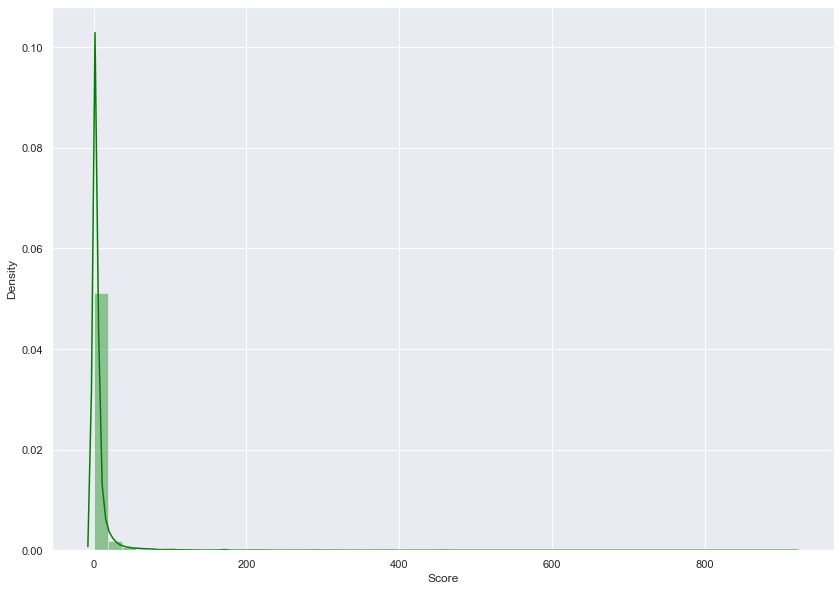

In [15]:
sns.distplot(total_ratings_per_product, color='green', kde=True, bins=50)

Here you can see that each product does not in fact have more than 200 ratings. 

In [16]:
#Let's see how many ratings each user gives
ratings_per_user = data.groupby(by='UserId')['Score'].count().sort_values(ascending=False)
ratings_per_user.head()

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
Name: Score, dtype: int64

So there are some users who are actually pretty consistent with rating more of their purchases. Would a machine learning algorithn favor and give the best matches to these users without pushing for these users to pay a premium? Would this create a bias? I think so, most dating app algorithms are geared towards those who pay

<AxesSubplot:xlabel='Score', ylabel='Density'>

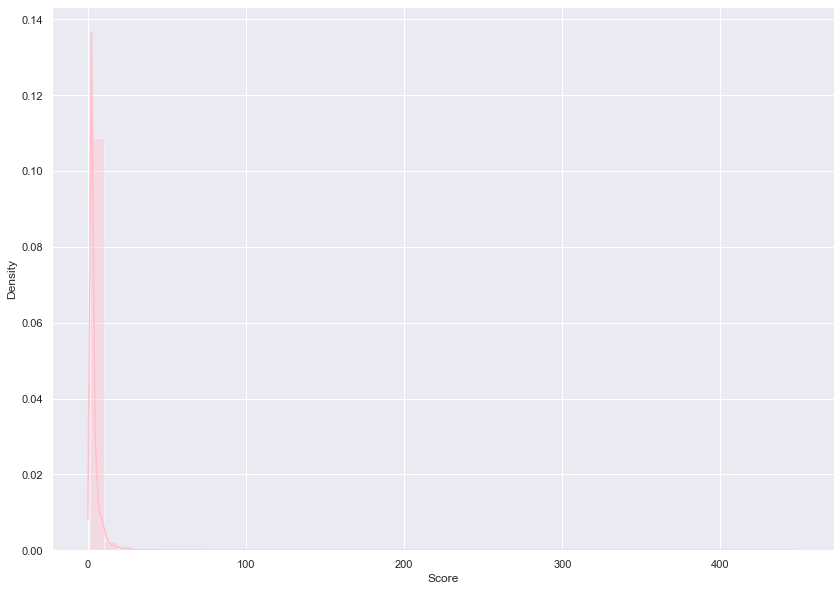

In [17]:
sns.distplot(ratings_per_user, color='pink', kde=True, bins=50)

I made another assumption above that most users only rate about one item. This graph has reinforced that assumption. 

In [18]:
#check the percentage of users that have only given 1 rating
one_rating = ratings_per_user[ratings_per_user==1].count()
percentage_one_rating = one_rating/ratings_per_user.count()
print('Total {} percentage of users that have only given one ratings'.format(percentage_one_rating*100))

Total 68.49632311303255 percentage of users that have only given one ratings


We can see over half of all users have only given 1 star

In [19]:
print('\n Number of rated products that have more than 50 ratings per userId : {}\n'.format(sum(ratings_per_user >=50)))


 Number of rated products that have more than 50 ratings per userId : 267



**I feel that if I were to take the users who have given more ratings, that would create a more biased algorithm, therefor I will not focus on just those users**

Now to take a subset of this data. In order to make it less computationally expensive. 

In [20]:
sample = data.sample(frac=.15)
sample.shape #let's see if this cuts the dataset down enough for my models to run

(85268, 10)

In [21]:
#it does not, let's just take a sample of about 5000
sample = data.sample(n=5000)
sample.shape

(5000, 10)

In [22]:
#now let's get this data ready for our recommendation system. I will do this by taking just the productId and the rating
ratings_avg_count = pd.DataFrame(sample.groupby('ProductId')['Score'].mean())
ratings_avg_count['total_ratings'] = pd.DataFrame(sample.groupby('ProductId')['Score'].count())
ratings_avg_count.head()

,Score,total_ratings
ProductId,,
0006641040,5.0,1
7310172001,5.0,2
7310172101,5.0,3
B00004CI84,4.0,1
B00004CXX9,5.0,3


In [23]:
#let's have a look at the highest amount of ratings 
ratings_avg_count['total_ratings'].max()

12

In [24]:
#now let's have a look at the lowest amount of ratings per user
ratings_avg_count['total_ratings'].min()

1

<AxesSubplot:xlabel='total_ratings'>

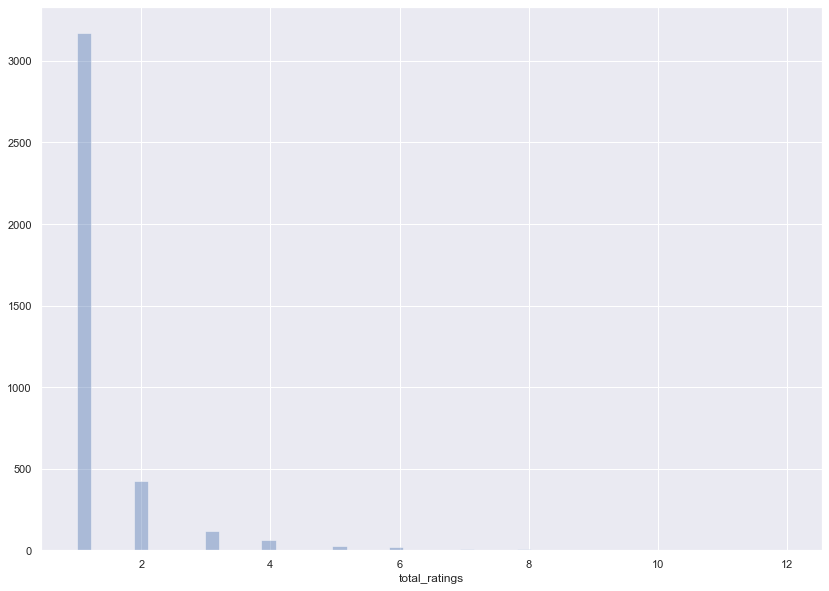

In [25]:
#out of the sample of 5000, let's check the distribution of total ratings
sns.distplot(ratings_avg_count['total_ratings'], kde=False, bins=50)

<AxesSubplot:xlabel='Score'>

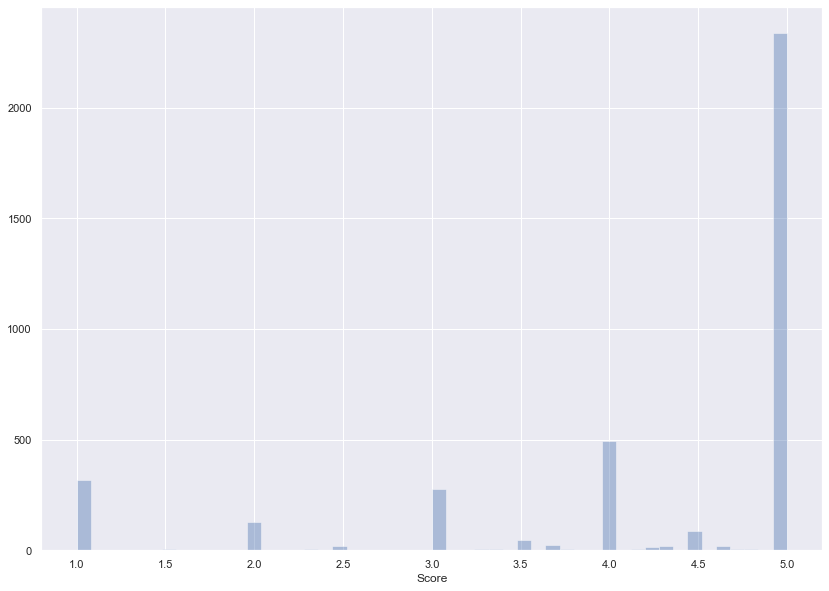

In [26]:
#Let's also have a look at the distribution of just the ratings 
sns.distplot(ratings_avg_count['Score'], kde=False, bins=50)

## Ratings Data Preprocessing

In [27]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
136329,136330,B006Q820X0,#oc-R30XCON3EIQHI,traceyfo,1,2,4,1340755200,free sample,Join their facebook page! They have a lot of g...
395312,395313,B000F1ZVSK,A1EP7KDY0Y4HM2,"nearlyimperfect ""nearlyimperfect""",0,0,2,1333843200,i know Cadbury eggs...these are no Cadbury eggs,A disappointment....i threw it away. i though...
476698,476699,B0039KERRK,A3AC0FFZOHAXMR,tealeaf,4,4,2,1317168000,mashed weirdness,They taste like onion powder. I knew they woul...
183328,183329,B004U43ZO0,A3K7H7RBZZ8DGD,"Laura Probst ""dragon wench""",0,0,2,1308787200,"Better than I expected, but not the greatest e...","I haven't had a Chips Ahoy cookie in many, man..."
66757,66758,B001ONVON4,AB094YABX21WQ,J. Gregg,0,0,5,1309996800,cheez-it,love thees crackers great with tomato soup or ...


In [30]:
#let's focus on the columns needed for this recommendation system 
sample_ratings = sample[['UserId', 'ProductId', 'Score']]
sample_ratings.head()

,UserId,ProductId,Score
136329,#oc-R30XCON3EIQHI,B006Q820X0,4
395312,A1EP7KDY0Y4HM2,B000F1ZVSK,2
476698,A3AC0FFZOHAXMR,B0039KERRK,2
183328,A3K7H7RBZZ8DGD,B004U43ZO0,2
66757,AB094YABX21WQ,B001ONVON4,5


In [53]:
class MyDataset(dataset.DatasetAutoFolds):
    #this function creates a surprise friendly dataset
    #this function already has folds built into it for cross-validation
    def __init__(self, df, reader):
        self.raw_ratings = [(uid, pid, r, None) for (uid, pid, r) in 
                      zip(sample_ratings['UserId'], sample_ratings['ProductId'], sample_ratings['Score'])]
        self.reader=reader

In [64]:
#instantiate the reader parset object
reader = Reader(line_format='user item rating', rating_scale=(0.0,5.0))

In [65]:
#parse sample clean dataframe into a surprise friendly dataset
surprise_sample = MyDataset(sample_ratings, reader)

In [56]:
#let's check to see if it's in the right format
type(surprise_sample)

__main__.MyDataset

## Train Validation Split: 
Our aim is make sure that our parameters are tuned to meet all the machine learning models we build and feed the data into. The train validation split is to help reduce biases

In [57]:
sample_ratings.head()

,UserId,ProductId,Score
136329,#oc-R30XCON3EIQHI,B006Q820X0,4
395312,A1EP7KDY0Y4HM2,B000F1ZVSK,2
476698,A3AC0FFZOHAXMR,B0039KERRK,2
183328,A3K7H7RBZZ8DGD,B004U43ZO0,2
66757,AB094YABX21WQ,B001ONVON4,5


In [58]:
#extract raw ratings from the dataset
raw_ratings = sample_ratings.Score

In [59]:
#test .15 of data 
test_threshold = int(.85*len(sample_ratings))
train_sample = sample[:test_threshold]
test_raw_sample = sample[test_threshold:]

In [60]:
#train data 
train_threshold = int(.8*len(train_sample))
validation_raw_sample = train_sample[train_threshold:]
train_raw_sample = train_sample[:train_threshold]

In [61]:
#check to see that no data has been lost during split: 
len(train_raw_sample) + len(test_raw_sample) + len(validation_raw_sample)

5000

# Baseline Model
## 1st Model: KNNBasic with Cosine Similarity (user based)

In [70]:
def KNN_Basic(data, user, item):
    
    #function to run different similarity metrics across KNNBasic
    
    frame = []
    similarity_met = ['cosine', 'msd', 'pearson']
    user_item = [True, False]
    for i in similarity_met: 
        #user to user similarities
        print("Evaluation of {} similarity for KNNBasic {} comparison: ". format(i, user))
        results = cross_validate(KNNBasic(sim_options={'name': i, 'user_based': True}), 
                                data=sample_ratings, cv=5, return_train_measures=True, n_jobs=-1, verbose=True)
        print('\n\n')
    #item to item similaries
    print('Evaluation of {} similarity for KNNBasic {} comparison:'. format(i, item))
    results = cross_validate(KNNBasic(sim_options={'name': i, 'user_based':False,}), 
                            data = sample_ratings, cv=5, return_train_measures=True, n_jobs=-1, verbose=True)
    print('\n\n')
    
    
    return None

In [71]:
KNN_Basic(data, 'user-user', 'item-item')

Evaluation of cosine similarity for KNNBasic user-user comparison: 


AttributeError: 'DataFrame' object has no attribute 'raw_ratings'

In [62]:
#cosine similarity
sim_cos = {'name': 'cosine', 'user_based':True}

#instantiate the model with the similarity settings:
basic_user = knns.KNNBasic(sim_options=sim_cos)

In [63]:
#fit the model 
simcos_crossval_user = cross_validate(basic_user, sample_ratings, measures=['rmse','mae'],cv=3, return_train_measures=True, n_jobs= -1,verbose=True)

AttributeError: 'DataFrame' object has no attribute 'raw_ratings'